In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [52]:
casas = pd.read_excel(r"C:\Users\mituc\Ironhack\Curso\IronLabs\Washington-washing-and-prediction\data\regression_data.xls")

In [3]:
casas.head(5)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [4]:
casas.shape

(21597, 21)

In [5]:
casas.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
casas.duplicated().sum()

0

In [7]:
columns = casas.columns
columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price'],
      dtype='object')

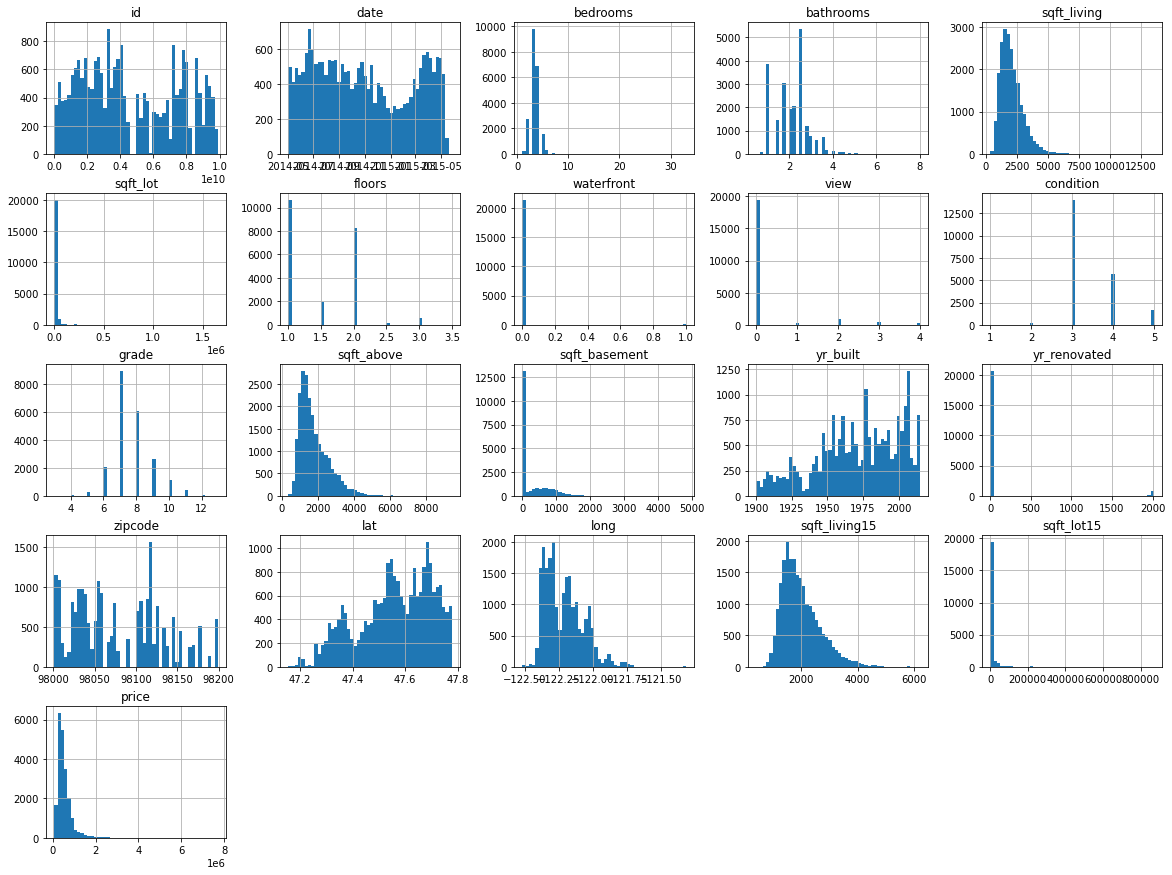

In [8]:
casas.hist(bins = 50, figsize = (20,15))
plt.show()

In [9]:
casas.corr()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.016772
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.308787
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303,0.525906
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342,0.701917
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204,0.089876
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722,0.256804
waterfront,-0.002727,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781,0.266398
view,0.011536,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904,0.397370
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126,0.036056
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.082888,0.251728,-0.146896,1.000000,0.756073,0.168220,0.447865,0.014261,-0.185771,0.113575,0.200341,0.713867,0.120981,0.667951


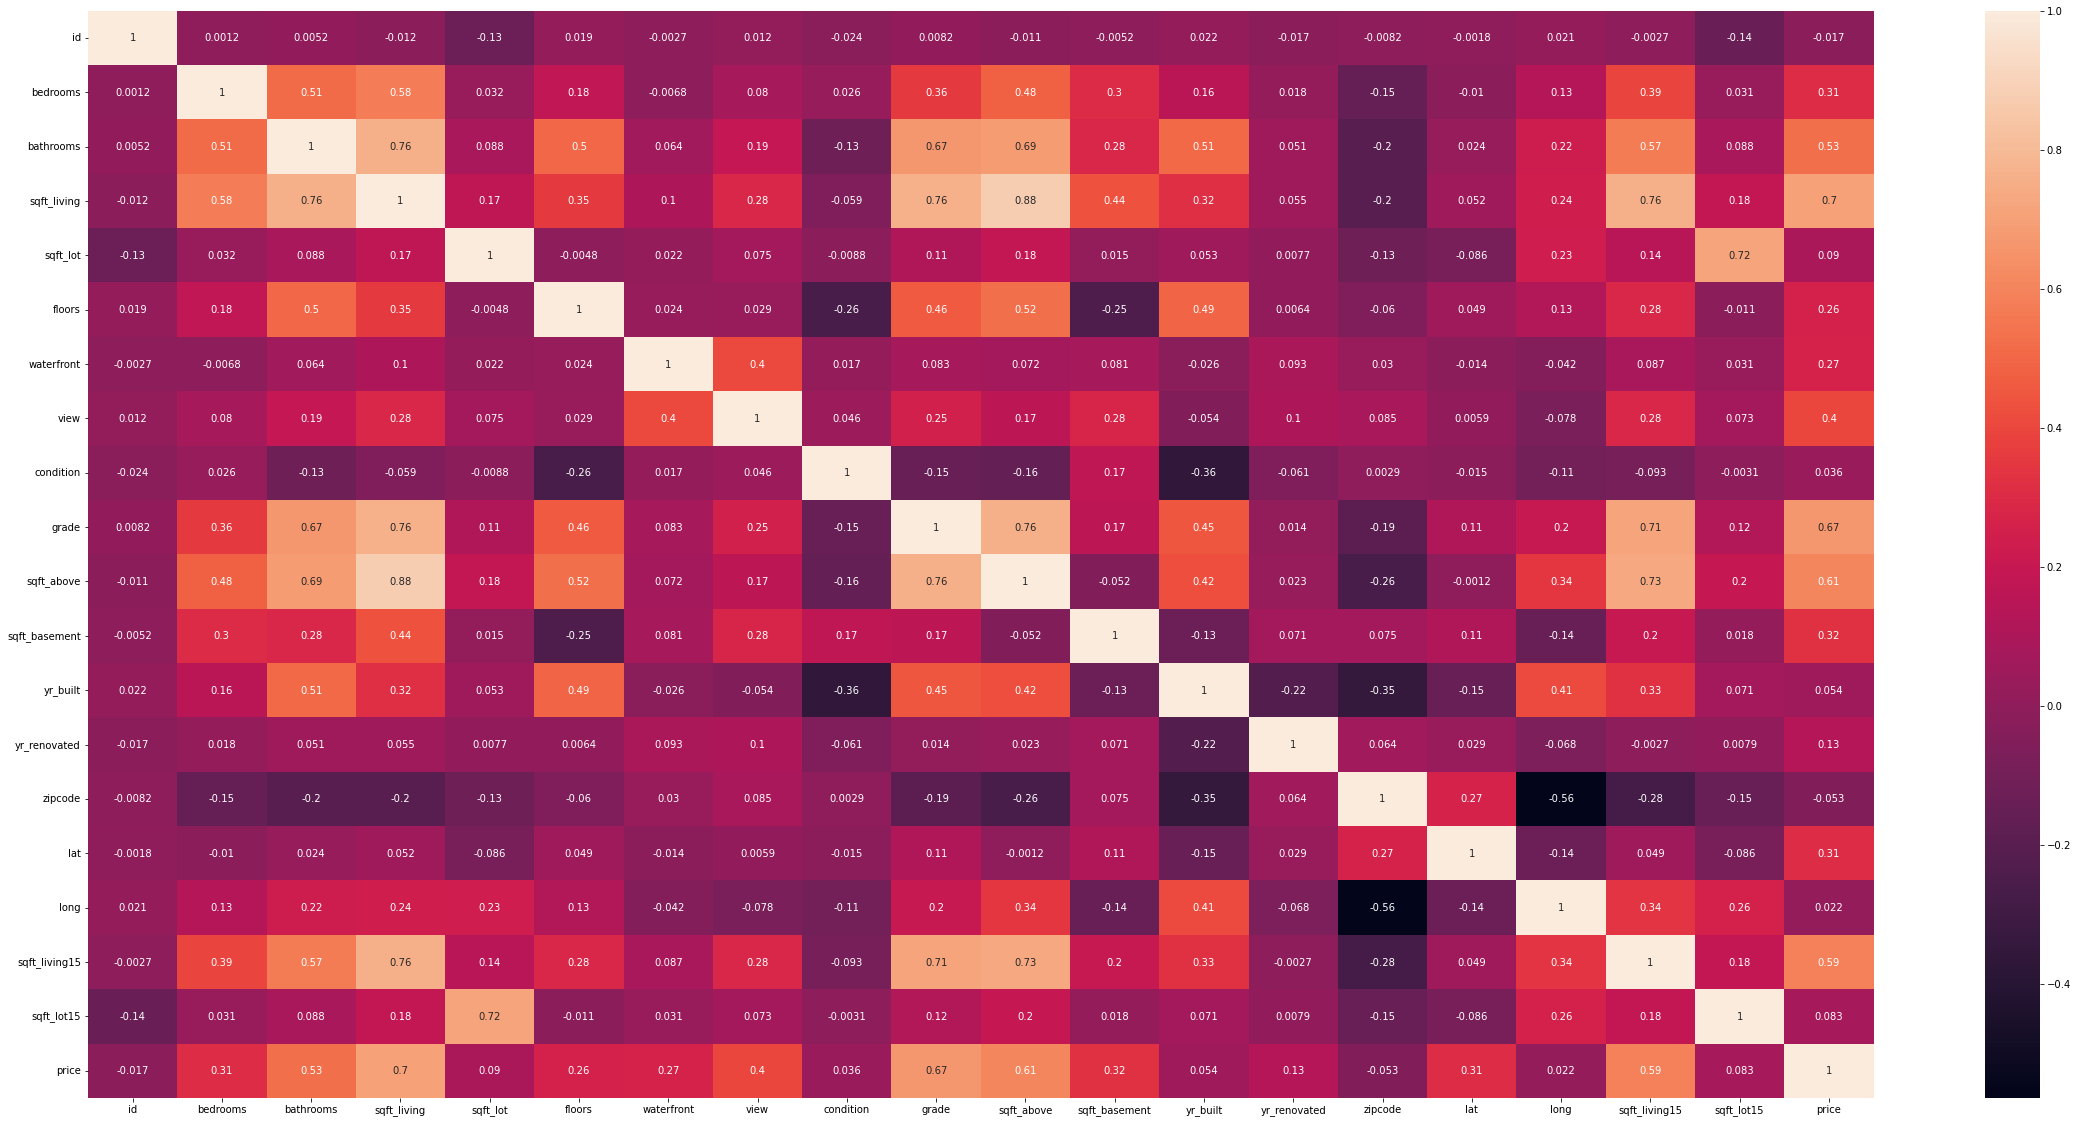

In [10]:
fig, ax = plt.subplots(figsize = (40,20))
sns.heatmap(casas.corr(), annot = True)
plt.size = (40,40)
plt.show()

<AxesSubplot:xlabel='lat', ylabel='long'>

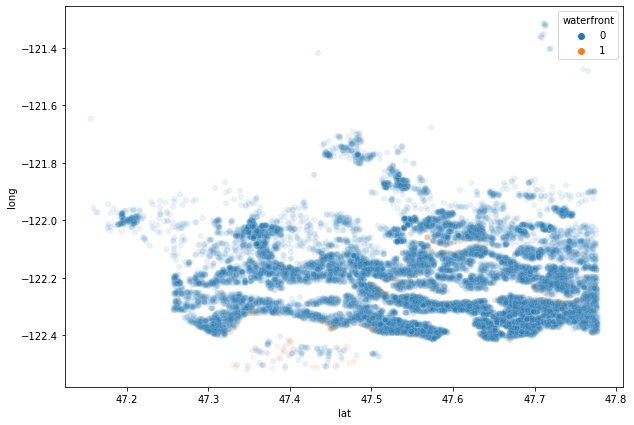

In [100]:
fig, ax = plt.subplots(figsize = (10,7))
sns.scatterplot(x='lat', y='long', hue='waterfront', alpha=0.1, data=casas)

In [12]:
corr_matrix = casas.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
lat              0.306692
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

In [25]:
len(casas['zipcode'].unique())

70

In [13]:
casas.dtypes

id                        int64
date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [14]:
casas.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [15]:
oi= casas[casas['bedrooms']==33]
oi

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
15856,2402100895,2014-06-25,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000


In [16]:
casas_no_date = casas.drop(["date"], axis = 1)

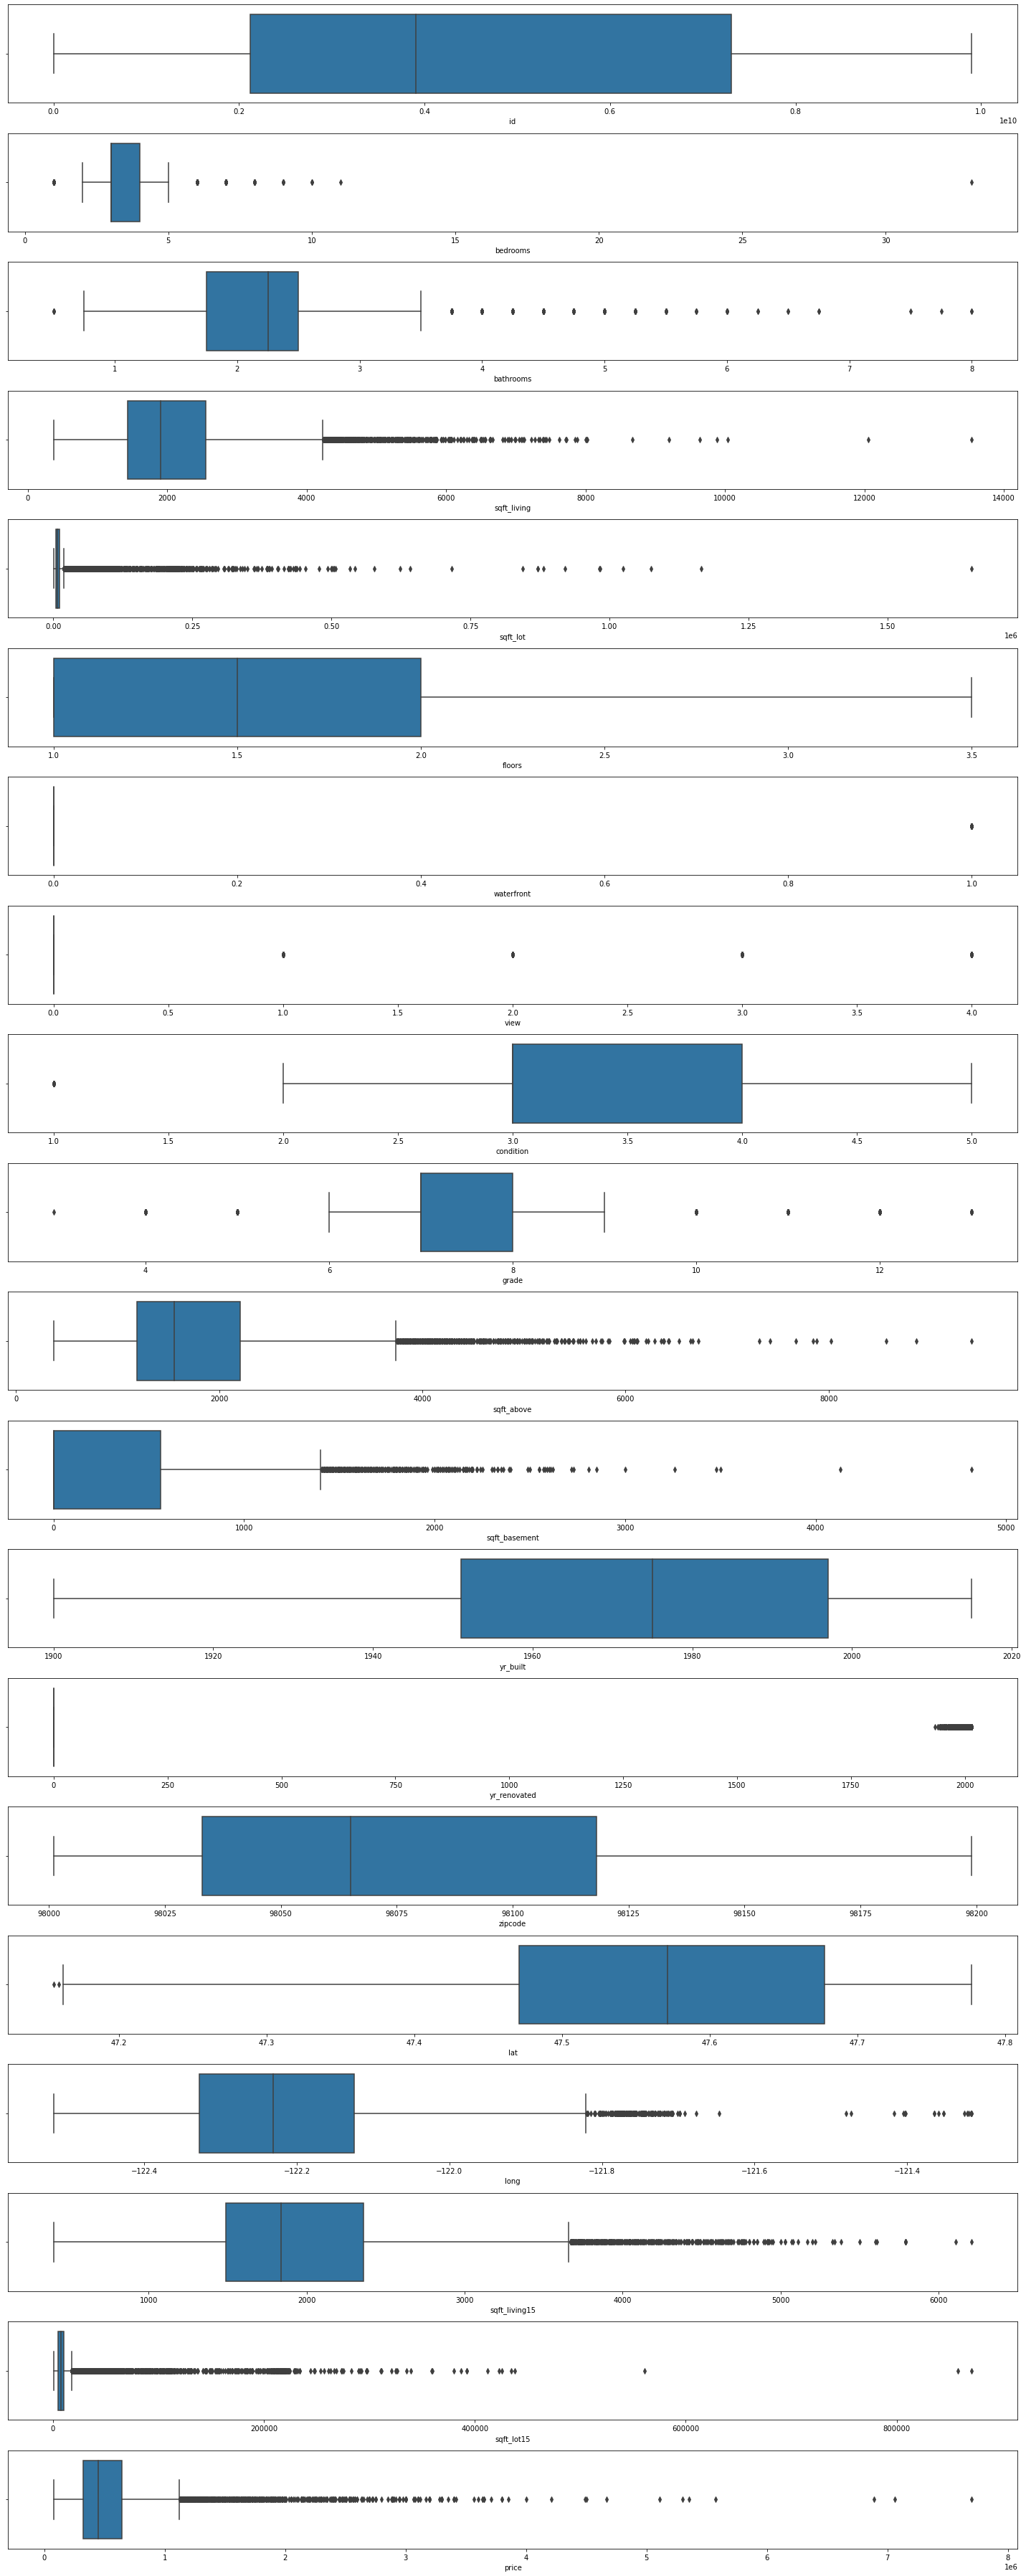

In [17]:
fig, ax = plt.subplots(20, 1, figsize=(20,50))

for i in range(len(casas_no_date.columns)):
    sns.boxplot(x=casas_no_date.columns[i], data=casas_no_date, ax=ax[i])
plt.tight_layout()
plt.show()

In [42]:
casas_limpio = casas.copy()

In [43]:
columnas_inutiles = ['date', 'lat','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_renovated', 'yr_built', 'long', 'id']

In [44]:
casas_limpio.drop(columnas_inutiles, inplace=True, axis=1)

In [45]:
casas_limpio.head(1)

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,price
0,3,1.0,1.0,0,0,3,7,1180,0,98178,221900


In [46]:
casas_limpio['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [47]:
casas_limpio[casas_limpio['sqft_basement']==4.820000e+03].count()

bedrooms         1
bathrooms        1
floors           1
waterfront       1
view             1
condition        1
grade            1
sqft_above       1
sqft_basement    1
zipcode          1
price            1
dtype: int64

In [48]:
col = ['floors', 'bathrooms']
for i in col:
    casas_limpio[i]=round(casas_limpio[i],0)

In [49]:
casas_limpio['bedrooms'].max()

33

In [51]:
casas_limpio.drop(casas_limpio[casas_limpio['bedrooms'] == casas_limpio['bedrooms'].max()].index, inplace=True)

In [56]:
casas_limpio[casas_limpio['condition']==casas_limpio['condition'].min()].shape

(29, 11)

In [57]:
casas_limpio.drop(casas_limpio[casas_limpio['condition'] == casas_limpio['condition'].min()].index, inplace=True)

In [63]:
casas_limpio['sqft_basement'].max()

4130

In [66]:
casas['sqft_basement'].max()

4130

In [61]:
for i in range(1):
    casas_limpio.drop(casas_limpio[casas_limpio['sqft_basement'] == casas_limpio['sqft_basement'].max()].index, inplace=True)

In [67]:
casas_limpio['bathrooms'].min()

0.0

In [68]:
casas_limpio[casas_limpio['bathrooms']==casas_limpio['bathrooms'].min()].count()

bedrooms         4
bathrooms        4
floors           4
waterfront       4
view             4
condition        4
grade            4
sqft_above       4
sqft_basement    4
zipcode          4
price            4
dtype: int64

In [101]:
casas_limpio.drop(casas_limpio[casas_limpio['bathrooms'] == 0].index, inplace=True)

In [80]:
casas_limpio['bat_bed'] = casas_limpio['bathrooms']/casas_limpio['bedrooms']
casas_limpio['sqft_floors'] = casas_limpio['sqft_above']/casas_limpio['floors']

In [81]:
casas_caras = casas_limpio[casas_limpio['price'] > 650000]

In [82]:
casas_caras.shape

(5202, 13)

In [83]:
casas_caras[casas_caras['sqft_basement'] > 0].count()

bedrooms         2572
bathrooms        2572
floors           2572
waterfront       2572
view             2572
condition        2572
grade            2572
sqft_above       2572
sqft_basement    2572
zipcode          2572
price            2572
bat_bed          2572
sqft_floors      2572
dtype: int64

In [73]:
casas_limpio[casas_limpio['sqft_basement'] > 0].count()

bedrooms         8480
bathrooms        8480
floors           8480
waterfront       8480
view             8480
condition        8480
grade            8480
sqft_above       8480
sqft_basement    8480
zipcode          8480
price            8480
dtype: int64

In [74]:
casas_limpio[casas_limpio['price'] > 6.450000e+05].count()

bedrooms         5368
bathrooms        5368
floors           5368
waterfront       5368
view             5368
condition        5368
grade            5368
sqft_above       5368
sqft_basement    5368
zipcode          5368
price            5368
dtype: int64

In [84]:
casas_caras.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,5202.0,3.830642,0.889144,1.000000,3.0,4.000000,4.0,10.0
bathrooms,5202.0,2.611303,0.890037,1.000000,2.0,2.000000,3.0,8.0
floors,5202.0,1.762399,0.484389,1.000000,1.0,2.000000,2.0,4.0
waterfront,5202.0,0.025183,0.156695,0.000000,0.0,0.000000,0.0,1.0
view,5202.0,0.633602,1.203217,0.000000,0.0,0.000000,0.0,4.0
condition,5202.0,3.463476,0.687119,2.000000,3.0,3.000000,4.0,5.0
grade,5202.0,8.870242,1.223167,5.000000,8.0,9.000000,10.0,13.0
sqft_above,5202.0,2553.861207,984.841607,580.000000,1770.0,2460.000000,3180.0,9410.0
sqft_basement,5202.0,465.751634,572.235890,0.000000,0.0,0.000000,890.0,4130.0
zipcode,5202.0,98073.557670,51.312066,98001.000000,98033.0,98074.000000,98115.0,98199.0


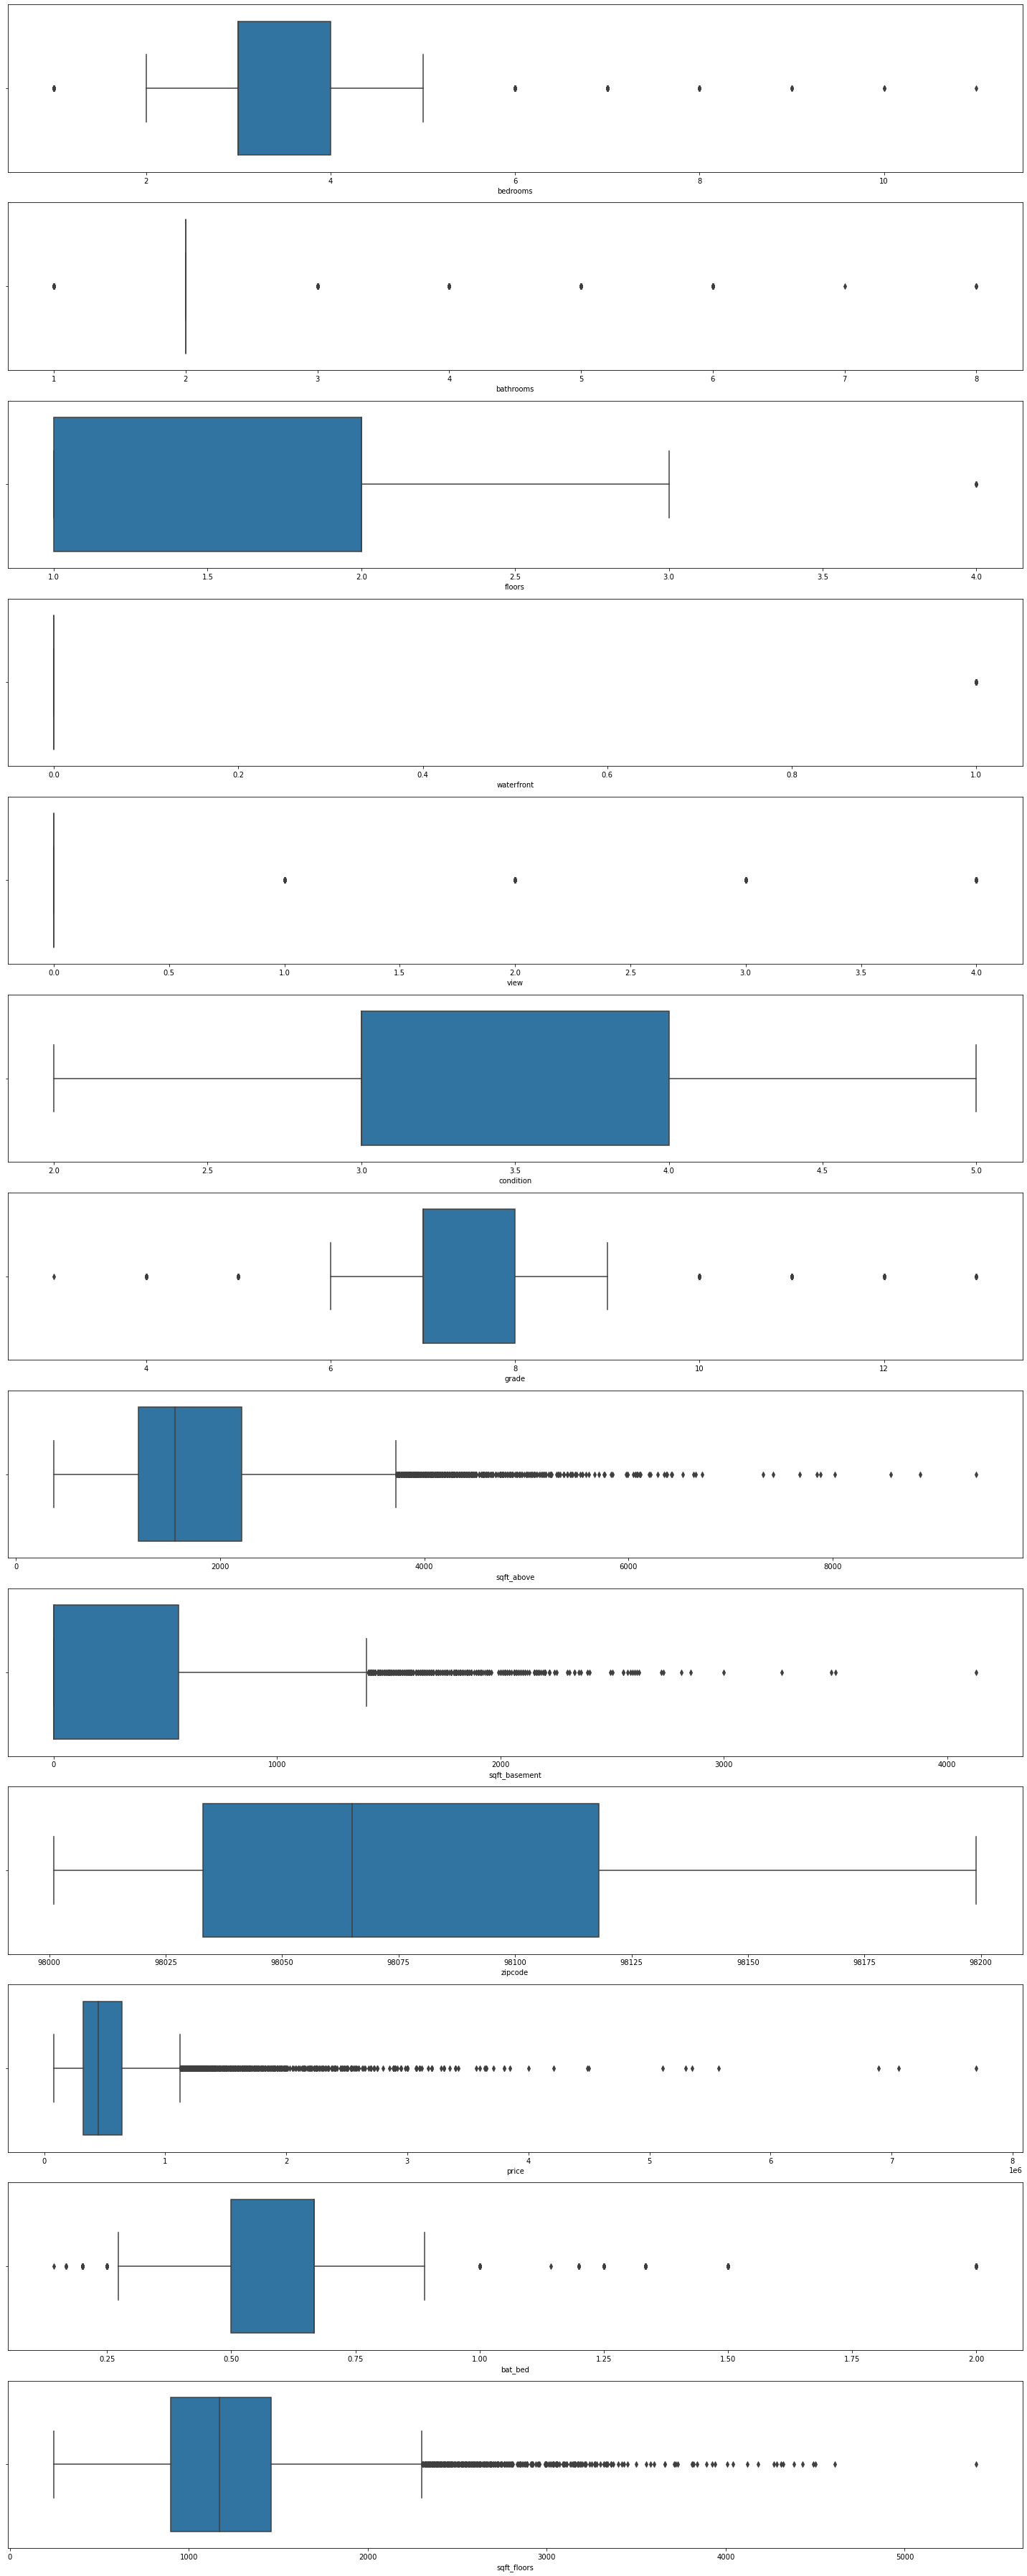

In [89]:
fig, ax = plt.subplots(13, 1, figsize=(20,50))

for i in range(len(casas_limpio.columns)):
    sns.boxplot(x=casas_limpio.columns[i], data=casas_limpio, ax=ax[i])
plt.tight_layout()
plt.show()

In [95]:
casas_limpio.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,21562.0,3.373064,0.903104,1.000000,3.0,3.000000,4.000000,11.0
bathrooms,21562.0,2.060941,0.753081,1.000000,2.0,2.000000,2.000000,8.0
floors,21562.0,1.535247,0.554431,1.000000,1.0,2.000000,2.000000,4.0
waterfront,21562.0,0.007467,0.086090,0.000000,0.0,0.000000,0.000000,1.0
view,21562.0,0.234069,0.765655,0.000000,0.0,0.000000,0.000000,4.0
condition,21562.0,3.413041,0.644911,2.000000,3.0,3.000000,4.000000,5.0
grade,21562.0,7.660282,1.171341,3.000000,7.0,7.000000,8.000000,13.0
sqft_above,21562.0,1789.465541,827.495699,370.000000,1200.0,1560.000000,2210.000000,9410.0
sqft_basement,21562.0,291.803404,441.780527,0.000000,0.0,0.000000,560.000000,4130.0
zipcode,21562.0,98077.921389,53.513450,98001.000000,98033.0,98065.000000,98118.000000,98199.0


In [114]:
def outliers(df, col):
    """
    Calculates the interquartile range of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Returns:
        q1: value of the first quartile
        q2: value of the second quartile
        outlier_iqr: interquartile range
    """
    q1 = np.nanpercentile(df[col], 25)
    q3 = np.nanpercentile(df[col], 75)
    iqr = q3 - q1
    outlier_step = 1.5 * iqr
    return q1, q3, outlier_step

def outliers_df(df, col):
    """
    Separates the outliers of a column in a dataframe.
    
    Args:
        df (pandas Data Frame)
        col (string): name of the column
    Methods:
        Uses the function outliers()
    Returns:
        outliers_data: dataframe with the outliers
    """
    outliers_data = df[(df[col] < outliers(df, col)[0] - outliers(df, col)[2]) | (df[col] > outliers(df, col)[1] + outliers(df, col)[2])]
    return outliers_data

def outliers_index(df, list_col):
    """
    Creates a list and a dictionary with the indexes of the outliers of a list of columns in a dataframe.
    
    Args:
        df (pandas Data Frame)
        list_col (list): list of strings with the names of the columns
    Methods:
        Uses the function outliers_df()
    Returns:
        dicc_index: dictionary with the name of the columns as keys and the indexes of the outliers as values
        outliers: list with the indexes of the outliers
    """
    dicc_index = {}
    for i in list_col:
        if outliers_df(df, i).shape[0] > 0:
            dicc_index[i] = list(outliers_df(df, i).index)
    outliers = list(set([i for sublist in list(dicc_index.values()) for i in sublist]))
    return dicc_index, outliers

In [110]:
casas_limpio.drop('bathrooms', inplace=True, axis=1)

In [111]:
outliers = outliers_index(casas_limpio, casas_limpio.columns)[1]

In [112]:
len(outliers)

6534

In [115]:
outliers_dict = outliers_index(casas_limpio, casas_limpio.columns)[0]

In [116]:
# Numero de outliers por columna
for i, k in outliers_dict.items():
    print(i, len(k))

bedrooms 523
floors 7
waterfront 161
view 2118
grade 1893
sqft_above 624
sqft_basement 495
price 1156
bat_bed 3243
sqft_floors 487


In [140]:
casas['bat_bed'].min()

0.14285714285714285

In [122]:
casas_limpio_no_outliers = casas_limpio.drop(outliers_dict['price'])

In [127]:
casas_limpio_no_outliers.drop('Unnamed: 0', inplace=True, axis=1)

In [130]:
casas_limpio_no_outliers.drop('floors', inplace=True, axis=1)

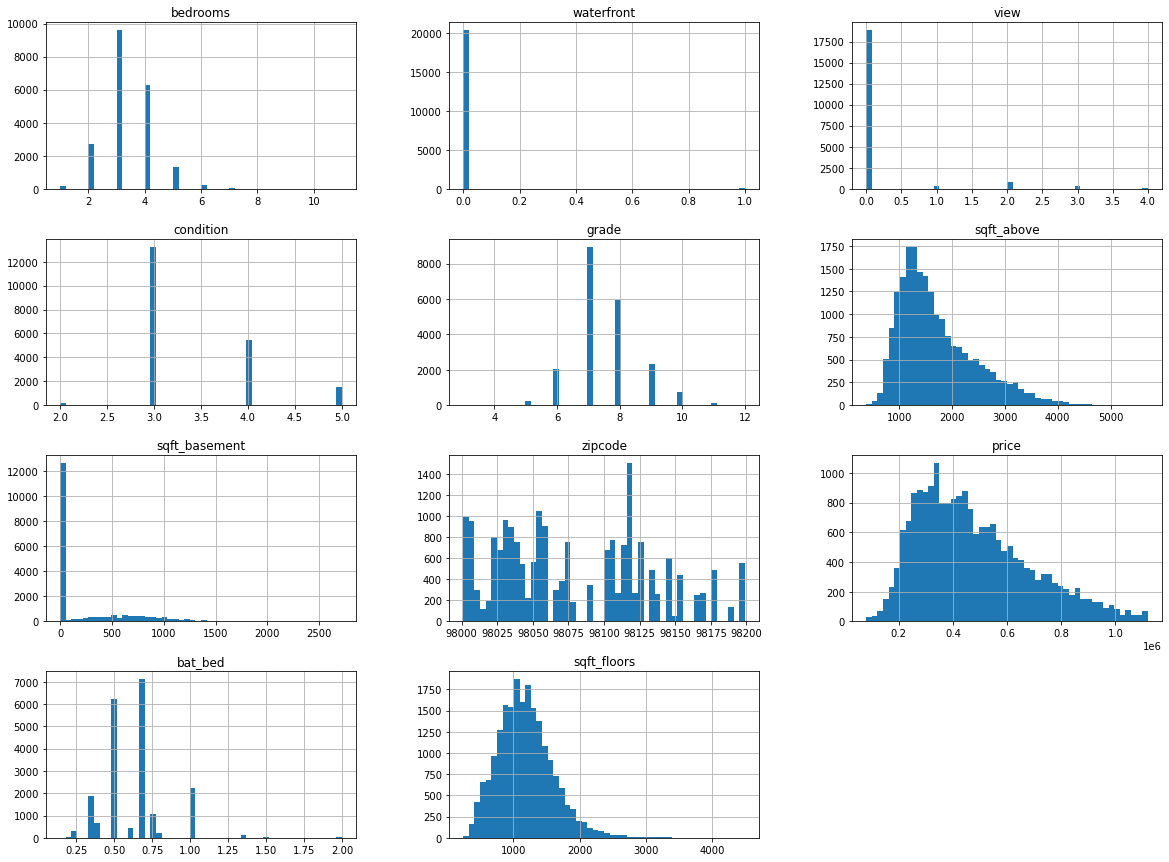

In [131]:
casas_limpio_no_outliers.hist(bins = 50, figsize = (20,15))
plt.show()

In [132]:
casas_limpio_no_outliers.to_csv(r"data\casas_limpio_no_outliers.csv")

In [97]:
casas_limpio.to_csv(r'data\casas_limpio.csv')